In [ ]:
"""Generation of simulated networks"""

"""
This program generates 100 random points (npoints=100) displayed in 10 different configurations in a square. 
It repeat each experiment 20 times (n_eperiments=20). The positions of the points are stored in a folder "position_xy_var01".

Then we compute the distance between the 100 points for each configuration and we create a Cx matrix (connectivity matrix). 
The Cx matrices are stored in a folder "Cx_matrix_var01".

"""
"""
__author__ = "Giulia Moreni"
__contact__ = "giulia.moreni1995@gmail.com"
__date__ = "2020/04/15"   
__status__ = "Concluded" 


####################
 Review History   #
####################

Reviewed by Name Date ### 


In [1]:
####################
# Libraries        #
####################
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np # version 1.0.1
import scipy as sio 
import glob 
from random import gauss 
import math as m 
import seaborn as sns 

In [98]:
#Code that generate the position of the points grouped in different ways
npoints=100 # number of points I generate in each square (grouped in 1,4,9,16,25...100 groups depending on the type of C)
positions= [[0 for x_y_coord in range(0,2)] for p in range(npoints)] #initialize positions x y of the points 
L=2 # the points are distributed between 0 and 2 
n_experiments=20 # for each configuration of sampled points I repeat the experiments 20 times

for exp in range(0,n_experiments):
    
    for i in range(0,10):
        
        grouped_points=int(npoints/(i+1)**2) #number of points in each group (100/1=100,100/4=25...)
        remainder = npoints%(i+1)**2 #number of points I have then to distribute (ex: 100/16= 6 with reminder: 4)
        
        f=open('position_xy_var01/position_i=%s_n=%s.txt'%(str(i+1).zfill(3),str(exp).zfill(3)),"w+")# I create a file to write the positions, 1 file for each configuration (i) and experiment(n_exp)
        a=0 #Initialise the index of the position matrix
        count=0 #Initialise the the count of the position matrix
        
        for x in range(0,i+1): #2 for loops to find the center of the gaussian where we distribute the points (see figure 3)
            for y in range(0,i+1):
                mean_x= (x+1)*L/(i+2) #mean for the x coordinate of the gaussian
                mean_y= (y+1)*L/(i+2) #mean for the y coordinate of the gaussian
                b=0 # when the remainder is 0 we place n=grouped_points around the founded means (see for loop below)
                #print(grouped_points)
                
                if count < remainder: # Allows to place the n points until you place all the points of the remainder
                    b=1
                    count=count+1
                for k in range(0,grouped_points+b): # generate the points in the founded position of mean_x-mean_y (ex C2: 100 points,25 in each group)
                                                    # b can be 0 or 1 depending on if we need to put or not the points of the remainder
                    #print(grouped_points+b)
                    positions[a][0]=gauss (mean_x,0.1*L/(i+1)) #position x
                    positions[a][1]=gauss (mean_y,0.1*L/(i+1)) #position y
                    f.write('%f %f \n'%(positions[a][0],positions[a][1])) #Write the positions in the file
                    a+=1 # Increment a to then write the following position when the loop starts again  
        f.close()            
#print(positions)

In [99]:
#Code that generate the Cx matrix (euclidean distance between all the generated points)
for exp in range(0,n_experiments): #I generate a Cx matrix for each experiment and each i(different configuration of points)
    for i in range(0,10):
        
        positions_data  = pd.read_csv('position_xy_var01/position_i=%s_n=%s.txt'%(str(i+1).zfill(3),str(exp).zfill(3)), delim_whitespace=True, names= 'x''y')#import the data from the files positions
        x= np.array(positions_data['x']) # Create an array containing the values of x and y stored in the file
        y= np.array(positions_data['y'])
        cx= [[0 for cx_x in range(0,len(x))] for cx_y in range(0,len(x))] #Create a matrix npoints x npoints to store the cx values
        f=open('Cx_matrix_var01/cx_i=%s_n=%s.txt'%(str(i+1).zfill(3),str(exp).zfill(3)),"w+") # Open a file to store the values of the matrix (one file for each type of configuration i and experiment n)
        
        for i in range(0,len(cx)): # Compute the distance between all the points 
            for j in range(i,len(cx)):
                cx[i][j]= m.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2) #Compute the distance between two points
                cx[j][i]=cx[i][j] #the matrix is simmetric

        for i in range(0,len(x)): # write the values of the Cx matrix in the correspondant file
            for j in range(0,len(x)):
                f.write('%f '%(cx[i][j]))
            f.write('\n')
        f.close()

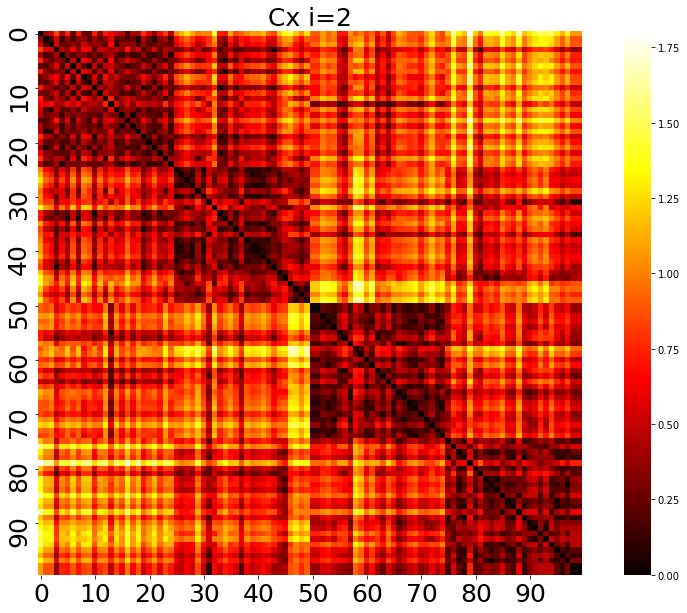

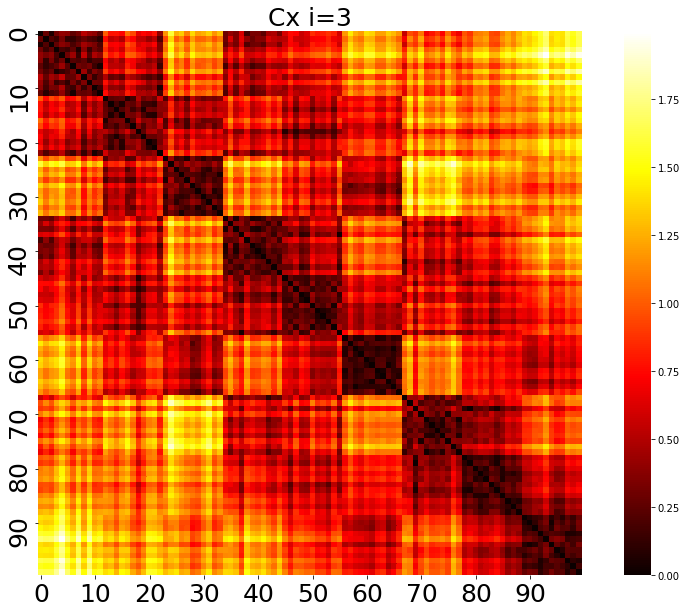

In [14]:
#Plot all the Cx matrix for the different configuration of points (just for the first experiment of each configuration n=000)
for i in range(0,10):
    cx=np.array(np.loadtxt('Cx_matrix_var01/cx_i=%s_n=000.txt'%(str(i+1).zfill(3))) ) # upload the Cx file in an array
    
    fig = plt.figure(figsize=(15, 10)) #create the figure 

    Cx_plot = sns.heatmap(cx,square=True,cmap='hot',xticklabels=10, yticklabels=10) #plot cx using heatmap
    Cx_plot.set(xlim=(0,100),ylim=(100,0)) #set the x,y range
    
    plt.title('Cx i=%s'%(str(i+1)),fontsize=25) #set title
    plt.tick_params(axis='both', labelsize=25)
    #fig.savefig('Cx_figures_var01/Cx i=%s.png'%(str(i+1))) #save the figures in the folder 
